# Import packages

In [585]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import dataset

In [586]:
# Import data
path_train = '/Users/yuwensun/Documents/研究生/哥大DS/STAT 5702/STAT5702-Community-Contribution/train.csv'
path_test = '/Users/yuwensun/Documents/研究生/哥大DS/STAT 5702/STAT5702-Community-Contribution/test.csv'
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

# split the data
target = "SalePrice"
df_train[target] = np.log(df_train[target])

y_train = df_train[target]
df_train = df_train.iloc[:,:-1]
df_test = df_test.iloc[:-1]

# Concatenate for future use
df_full = pd.concat([df_train, df_test], keys = ['train', 'test'])
print(df_full.to_string())

#  Id
df_full.drop("Id", axis = 1, inplace=True)

              Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition
train 0        1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub 

In [587]:
# Because 'MiscFeature', 'MiscVal' are other characteristics, so we drop it for convienence.
unable_deal_features = ['MiscFeature', 'MiscVal']
df_full.drop(unable_deal_features, axis = 1, inplace=True)

In [588]:
# print(df_full.dtypes.to_string())
print(df_full.shape)
# print(df_full.to_string())
print(df_full.dtypes.to_string())

(2918, 77)
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC     

# Find categorical, discrete, and numerical values

In [589]:
disc_features = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']
print(len(disc_features))

17


In [590]:
num_features = [f for f in df_full.columns.to_list() if (df_full.dtypes[f] != 'object')]
for f in disc_features:
    num_features.remove(f) 
print(num_features)
print(len(num_features))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
18


In [591]:
# Find numeric and categorical data
cat_features = [f for f in df_full.columns.to_list() if (df_full.dtypes[f] == 'object')]
cat_feature_with_nan = ['Alley', 'FireplaceQu', 'GarageQual', 'PoolQC', 
                        'Fence', 'GarageCond', 'GarageFinish', 'GarageType', 'BsmtExposure', 
                        'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']
print(len(cat_features))
print(df_full.isnull().sum().sort_values(ascending=False).to_string())

42
PoolQC           2908
Alley            2720
Fence            2347
FireplaceQu      1420
LotFrontage       486
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageFinish      159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtFullBath        2
BsmtHalfBath        2
Utilities           2
BsmtFinSF1          1
SaleType            1
KitchenQual         1
Electrical          1
TotalBsmtSF         1
BsmtUnfSF           1
BsmtFinSF2          1
Exterior1st         1
GarageCars          1
Exterior2nd         1
GarageArea          1
ScreenPorch         0
YrSold              0
BedroomAbvGr        0
KitchenAbvGr        0
HalfBath            0
TotRmsAbvGrd        0
Fireplaces          0
PoolArea            0
MoSold              0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
Enclose

In [592]:
# Filling NaN values with None
for feature in cat_feature_with_nan:
    df_full[feature].fillna("None", inplace=True)
print(df_full.isnull().sum().sort_values(ascending=False).to_string())

LotFrontage      486
GarageYrBlt      159
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
KitchenQual        1
Exterior2nd        1
BsmtFinSF2         1
BsmtFinSF1         1
GarageArea         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
GarageCars         1
Exterior1st        1
SaleType           1
GarageQual         0
KitchenAbvGr       0
YrSold             0
FullBath           0
HalfBath           0
MoSold             0
Fence              0
PoolQC             0
PoolArea           0
BedroomAbvGr       0
ScreenPorch        0
3SsnPorch          0
GarageFinish       0
TotRmsAbvGrd       0
EnclosedPorch      0
Fireplaces         0
FireplaceQu        0
GarageType         0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GrLivArea          0
GarageCond         0
MSSubClass         0
Heating            0
LowQualFinSF       0
2ndFlrSF           0
LotArea      

In [593]:
print(f"Discrete length: {len(disc_features)}, {disc_features}")
print(f"Numeric length: {len(num_features)}, {num_features}")
print(f"Categorical length: {len(cat_features)}, {cat_features}")

Discrete length: 17, ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']
Numeric length: 18, ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
Categorical length: 42, ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',

# Exploratory data analysis

## Handling missing values

In [594]:
df_full

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
train 0             60       RL         65.0     8450   Pave  None      Reg   
      1             20       RL         80.0     9600   Pave  None      Reg   
      2             60       RL         68.0    11250   Pave  None      IR1   
      3             70       RL         60.0     9550   Pave  None      IR1   
      4             60       RL         84.0    14260   Pave  None      IR1   
...                ...      ...          ...      ...    ...   ...      ...   
test  1453         160       RM         21.0     1526   Pave  None      Reg   
      1454         160       RM         21.0     1936   Pave  None      Reg   
      1455         160       RM         21.0     1894   Pave  None      Reg   
      1456          20       RL        160.0    20000   Pave  None      Reg   
      1457          85       RL         62.0    10441   Pave  None      Reg   

           LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch  \
train 0            Lvl    AllPub    Inside  ...             0         0   
      1            Lvl    AllPub       FR2  ...             0         0   
      2            Lvl    AllPub    Inside  ...             0         0   
      3            Lvl    AllPub    Corner  ...           272         0   
      4            Lvl    AllPub       FR2  ...             0         0   
...                ...       ...       ...  ...           ...       ...   
test  1453         Lvl    AllPub    Inside  ...             0         0   
      1454         Lvl    AllPub    Inside  ...             0         0   
      1455         Lvl    AllPub    Inside  ...             0         0   
      1456         Lvl    AllPub    Inside  ...             0         0   
      1457         Lvl    AllPub    Inside  ...             0         0   

           ScreenPorch PoolArea PoolQC  Fence  MoSold  YrSold  SaleType  \
train 0              0        0   None   None       2    2008        WD   
      1              0        0   None   None       5    2007        WD   
      2              0        0   None   None       9    2008        WD   
      3              0        0   None   None       2    2006        WD   
      4              0        0   None   None      12    2008        WD   
...                ...      ...    ...    ...     ...     ...       ...   
test  1453           0        0   None  GdPrv       6    2006        WD   
      1454           0        0   None   None       6    2006        WD   
      1455           0        0   None   None       4    2006        WD   
      1456           0        0   None   None       9    2006        WD   
      1457           0        0   None  MnPrv       7    2006        WD   

            SaleCondition  
train 0            Normal  
      1            Normal  
      2            Normal  
      3           Abnorml  
      4            Normal  
...                   ...  
test  1453         Normal  
      1454         Normal  
      1455        Abnorml  
      1456        Abnorml  
      1457         Normal  

[2918 rows x 77 columns]

In [595]:
# df_full.isnull().sum().sort_values(ascending=False).to_string())
df_train = df_full.loc['train'].copy()
df_test = df_full.loc['test'].copy()
print(df_train.isnull().sum().sort_values(ascending=False).to_string())

LotFrontage      259
GarageYrBlt       81
MasVnrType         8
MasVnrArea         8
Electrical         1
MoSold             0
HalfBath           0
SaleType           0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
FullBath           0
Fireplaces         0
BsmtHalfBath       0
BsmtFullBath       0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YrSold             0
FireplaceQu        0
Fence              0
WoodDeckSF         0
PoolQC             0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
PavedDrive         0
GarageType         0
GarageCond         0
GarageQual         0
GarageArea         0
GarageCars         0
GarageFinish       0
CentralAir         0
MSSubClass         0
Heating            0
HeatingQC          0
MSZoning           0
OverallCond        0
OverallQual        0
HouseStyle         0
BldgType           0
Condition2   

In [596]:
# Drop rows
columns = ['MasVnrType', 'MasVnrArea', 'Electrical']
df_train.dropna(subset = columns, axis = 0, inplace=True)
dropped_indices = df_full.loc['train'].index.difference(df_train.index).tolist()
df_full = pd.concat([df_train, df_test], keys = ['train', 'test'])
print(f"Dropped indices are {dropped_indices}")
print(df_full.isnull().sum().sort_values(ascending=False).to_string())

Dropped indices are [234, 529, 650, 936, 973, 977, 1243, 1278, 1379]
LotFrontage      484
GarageYrBlt      159
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFinSF1         1
Exterior2nd        1
GarageCars         1
GarageArea         1
KitchenQual        1
Exterior1st        1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
KitchenAbvGr       0
FireplaceQu        0
TotRmsAbvGrd       0
HalfBath           0
Fireplaces         0
FullBath           0
BedroomAbvGr       0
MSSubClass         0
GarageType         0
3SsnPorch          0
YrSold             0
MoSold             0
Fence              0
PoolQC             0
PoolArea           0
ScreenPorch        0
EnclosedPorch      0
LowQualFinSF       0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageCond         0
GarageQual         0
GarageFinish       0
GrLivArea          0
Heating

In [597]:
# Missed value columns
null_count = df_full.isnull().sum() / len(df_full)
missvalue_index = null_count[null_count != 0].index.to_list()
print(f"Missed values are: {missvalue_index}")

# df_full_X_dropped[missvalue_index].dtypes
# df_full_X_dropped[missvalue_index]
missvalue_index_num = [f for f in missvalue_index if (df_full.dtypes[f] != 'object')]
missvalue_index_cat = [f for f in missvalue_index if (df_full.dtypes[f] == 'object')]
print(f"Numercial columns are going to fill missing values are: {missvalue_index_num}")
print(f"Categorical columns are going to fill missing values are: {missvalue_index_cat}")

Missed values are: ['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SaleType']
Numercial columns are going to fill missing values are: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
Categorical columns are going to fill missing values are: ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'KitchenQual', 'Functional', 'SaleType']


### Numerical values

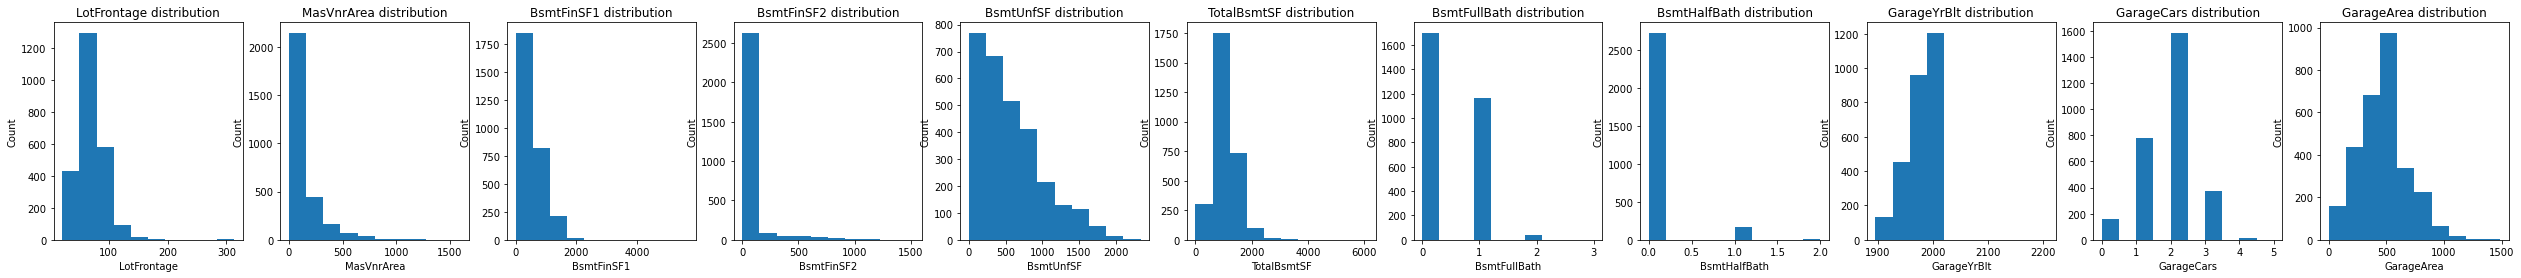

In [572]:
# Dealing with missing values of num categories
fig, ax = plt.subplots(1,len(missvalue_index_num), figsize = (4 * len(missvalue_index_num), 4))
for index in missvalue_index_num:
    i = missvalue_index_num.index(index)
    ax[i].hist(df_full.loc[(~df_full[index].isnull()), index])
    ax[i].set_title(index + ' distribution')
    ax[i].set_xlabel(index)
    ax[i].set_ylabel('Count')

## After seeing all histograms, because it has some outliers, so we'd better to use median for missing values 
# for index in missvalue_index_num:
#     df_full[index].fillna(df_full[index].median(skipna = True), inplace = True)

# df_train_X_dropped[missvalue_index_num].info()

### Remove outliers
Actually, from above, we find ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'GarageArea'] has outlier values, thus make the distribution very skewed.

In [573]:
lst = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF']
outlier_values = [250, 1350, 2200, 1350, 3800]

for i in range(len(lst)):
    feature = lst[i]
    outlier_value = outlier_values[i]
    df_full.loc[(df_full[feature] > outlier_value), feature] = outlier_value

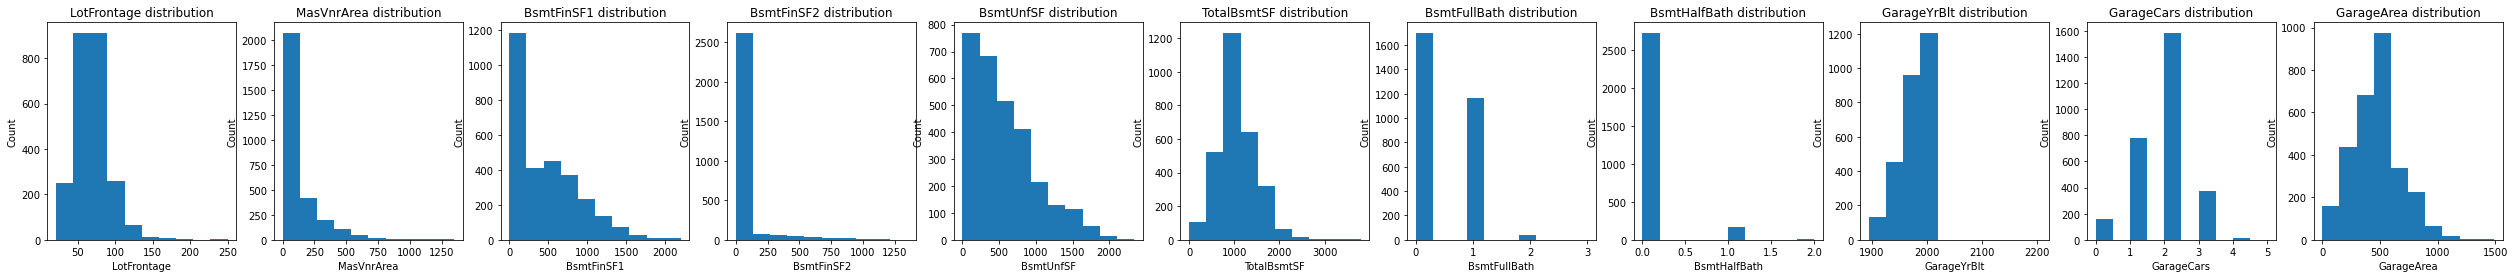

In [574]:
fig, ax = plt.subplots(1,len(missvalue_index_num), figsize = (4 * len(missvalue_index_num), 4))
for index in missvalue_index_num:
    i = missvalue_index_num.index(index)
    ax[i].hist(df_full.loc[(~df_full[index].isnull()), index])
    ax[i].set_title(index + ' distribution')
    ax[i].set_xlabel(index)
    ax[i].set_ylabel('Count')

In [575]:
# filling missing values
for index in missvalue_index_num:
    df_full[index].fillna(df_full[index].median(skipna = True), inplace = True)

### Categorical values

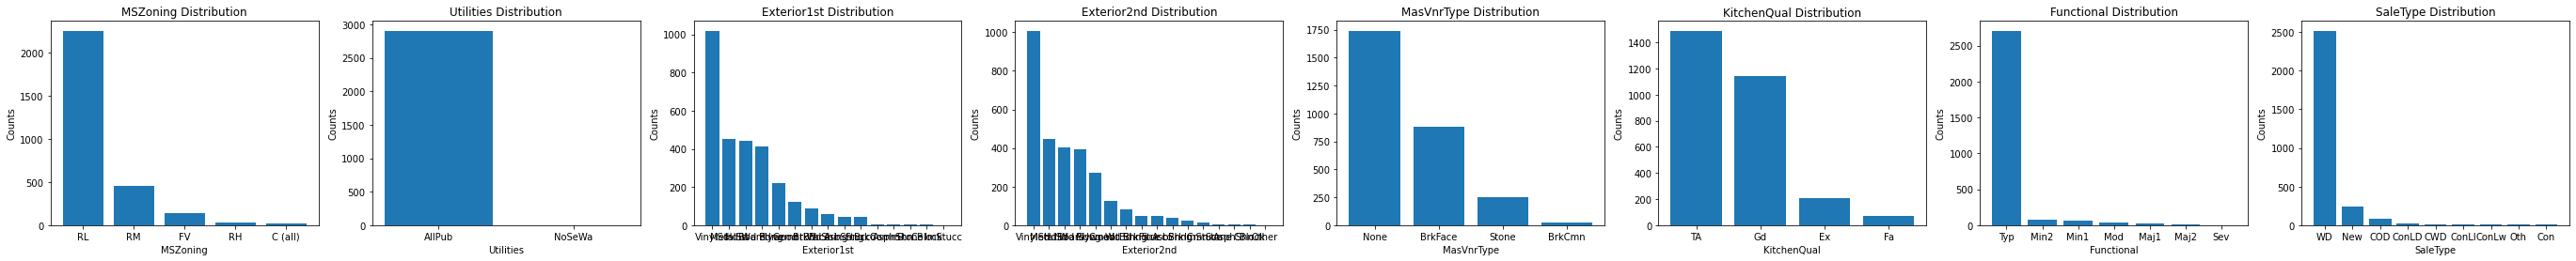

In [576]:
fix, ax = plt.subplots(1,len(missvalue_index_cat), figsize = (6 * len(missvalue_index_cat),4))

for index in missvalue_index_cat:
    i = missvalue_index_cat.index(index)

    feature_counts = df_full.loc[~df_full[index].isnull(), index].value_counts()
    features = feature_counts.index.to_list()
    counts = feature_counts.to_list()

    ax[i].bar(features, counts)
    ax[i].set_title(index + ' Distribution')
    ax[i].set_xlabel(index)
    ax[i].set_ylabel('Counts')

From above, we know ['Utilities', 'Functional', 'SaleType'] are very imbalanced, therefore, those variables will be insignificant.

In [577]:
lst = ['Utilities', 'Functional', 'SaleType']
df_full.drop(lst, axis = 1, inplace=True)
for f in lst:
    cat_features.remove(f)
    missvalue_index_cat.remove(f)

for index in missvalue_index_cat:
    df_full[index].fillna(df_full[index].mode(dropna = True)[0], inplace = True)

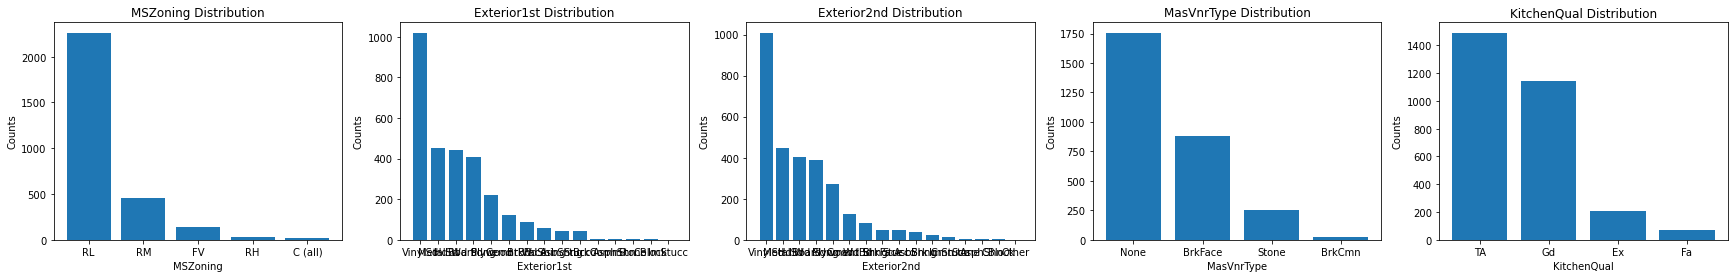

In [578]:
fix, ax = plt.subplots(1,len(missvalue_index_cat), figsize = (6 * len(missvalue_index_cat),4))

for index in missvalue_index_cat:
    i = missvalue_index_cat.index(index)

    feature_counts = df_full.loc[~df_full[index].isnull(), index].value_counts()
    features = feature_counts.index.to_list()
    counts = feature_counts.to_list()

    ax[i].bar(features, counts)
    ax[i].set_title(index + ' Distribution')
    ax[i].set_xlabel(index)
    ax[i].set_ylabel('Counts')

## Relations between y and X

In [579]:
y_train.drop(dropped_indices, inplace=True)
X_train = df_full.loc['train']
print(f"Discrete length: {len(disc_features)}, {disc_features}")
print(f"Numeric length: {len(num_features)}, {num_features}")
print(f"Categorical length: {len(cat_features)}, {cat_features}")

Discrete length: 17, ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']
Numeric length: 18, ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
Categorical length: 39, ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinis

## Scatterplot

In [580]:
# sns.pairplot(pd.concat([X_train[num_features], y_train], axis = 1))

## Boxplot

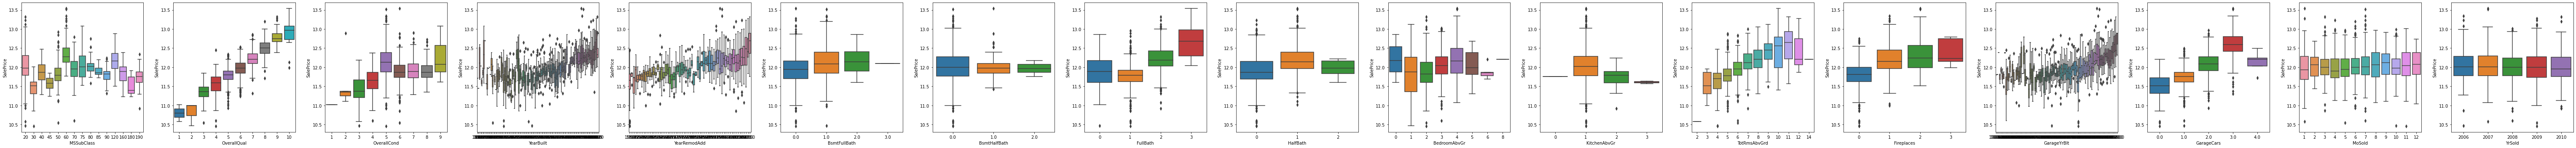

In [581]:
fig, axes = plt.subplots(nrows=1, ncols=len(disc_features), figsize=(5 * len(disc_features), 5))

df = pd.concat([X_train[disc_features], y_train], axis=1)
for i, feature in enumerate(disc_features):
    sns.boxplot(x = feature, y = y_train, data = df, ax=axes[i])

plt.tight_layout()

In [582]:
lst = ['BsmtHalfBath', 'MoSold', 'YrSold']
df_full.drop(lst, axis = 1, inplace=True)
for f in lst:
    disc_features.remove(f)

In [583]:
print(f"Discrete length: {len(disc_features)}, {disc_features}")
print(f"Numeric length: {len(num_features)}, {num_features}")
print(f"Categorical length: {len(cat_features)}, {cat_features}")

Discrete length: 14, ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars']
Numeric length: 18, ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
Categorical length: 39, ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Pav